___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [2]:
all_data = pd.read_csv('loan_data.csv')
all_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


(array([[   6.,  244., 1058., 2039., 1450., 1199., 1151.,  519.,  292.,
           87.],
        [   6.,  106.,  316.,  446.,  285.,  193.,  118.,   39.,   21.,
            3.]]),
 array([612. , 633.5, 655. , 676.5, 698. , 719.5, 741. , 762.5, 784. ,
        805.5, 827. ]),
 <a list of 2 BarContainer objects>)

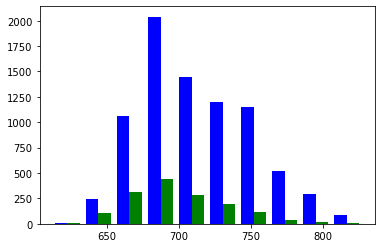

In [7]:
y1 = all_data.loc[(all_data['not.fully.paid'] == 0), 'fico']
y2 = all_data.loc[(all_data['not.fully.paid'] == 1), 'fico']
colors = ['b','g']

fig, ax1 = plt.subplots()
ax1.hist([y1,y2],color=colors)



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


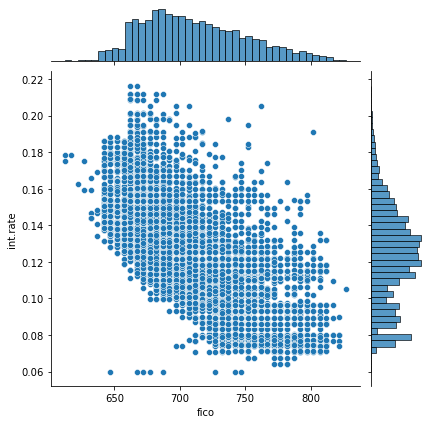

In [8]:
axs = sns.jointplot('fico', 'int.rate', data=all_data)

# df1 = all_data['fico']
# df2 = all_data['int.rate']

# graph = sns.jointplot(x=df1.x1, y=df1.y1, color='r')

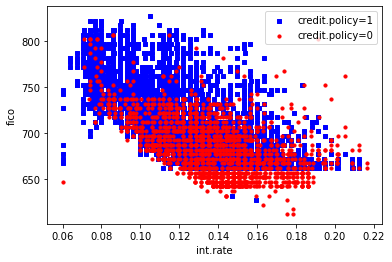

In [20]:
# Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції
base1=all_data[['int.rate','fico','credit.policy']]
base2 = base1[base1['credit.policy'] == 1]
base3 = base1[base1['credit.policy'] == 0]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(base2['int.rate'], base2['fico'], s=10, c='b', marker="s", label='credit.policy=1')
ax.scatter(base3['int.rate'], base3['fico'], s=10, c='r', marker="o", label='credit.policy=0')
plt.legend(loc='upper right');
ax.set_xlabel('int.rate')
ax.set_ylabel('fico')
plt.show()

In [21]:
# purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

all_data1=pd.get_dummies(all_data["purpose"])
del all_data["purpose"]

all_data = pd.concat([all_data, all_data1],axis=1, join="inner")
all_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [22]:
# Розбийте датасет на тестві та трейнові дані
from sklearn.model_selection import train_test_split

y = all_data["credit.policy"]
X = all_data.drop('credit.policy',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Логістична регресія

In [23]:
from sklearn.linear_model import LogisticRegression



logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [24]:
logmodel.score(X_train,y_train)

0.8994857410004675

In [25]:
logmodel.score(X_test,y_test)

0.8937045238848466

In [26]:
y_predictions = logmodel.predict(X_test)

In [27]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_predictions)

0.8937045238848466

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.85      0.55      0.67       613
           1       0.90      0.98      0.94      2548

    accuracy                           0.89      3161
   macro avg       0.88      0.76      0.80      3161
weighted avg       0.89      0.89      0.88      3161



In [29]:
m1=confusion_matrix(y_test,y_predictions)
print(m1)

[[ 336  277]
 [  59 2489]]


# Дерево рішень

In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier



for i in range(1,20):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train,y_train)
    print(f'qty_depth = {i} Score = {dtree.score(X_train,y_train)}')

qty_depth = 1 Score = 0.9005765934237182
qty_depth = 2 Score = 0.9496649524700016
qty_depth = 3 Score = 0.9678977715443353
qty_depth = 4 Score = 0.9797413121396291
qty_depth = 5 Score = 0.9878447872837774
qty_depth = 6 Score = 0.9914290166744585
qty_depth = 7 Score = 0.9922081969767804
qty_depth = 8 Score = 0.9940782297023532
qty_depth = 9 Score = 0.9961040984883902
qty_depth = 10 Score = 0.9970391148511766
qty_depth = 11 Score = 0.9985974754558204
qty_depth = 12 Score = 0.9990649836372136
qty_depth = 13 Score = 0.9995324918186068
qty_depth = 14 Score = 0.9998441639395356
qty_depth = 15 Score = 1.0
qty_depth = 16 Score = 1.0
qty_depth = 17 Score = 1.0
qty_depth = 18 Score = 1.0
qty_depth = 19 Score = 1.0


In [31]:
dtree = DecisionTreeClassifier(max_depth=17)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=17)

In [32]:
predictions = dtree.predict(X_test)

In [33]:
dtree.score(X_train,y_train)

1.0

In [34]:
dtree.score(X_test,y_test)

0.9879784878203101

In [35]:
pip install dtreeviz

  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66643 sha256=0e94fceedfb68451b58c5920714e4866ce6a8df9cf579399a5316983230c2d96
  Stored in directory: c:\users\алекс\appdata\local\pip\cache\wheels\9e\37\2c\3b30269ca762b6bb992fd0abb640f3e384c290e719597fddbc
Successfully built dtreeviz
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from dtreeviz.trees import *
viz = dtreeviz(dtree,
               X,
               y,
               target_name='credit.policy',
               )
              
viz.view()

[Text(528.3665477362205, 631.9350000000001, 'X[8] <= 3.5\ngini = 0.315\nsamples = 6417\nvalue = [1255, 5162]'),
 Text(429.31262303149606, 591.1650000000001, 'X[4] <= 659.5\ngini = 0.172\nsamples = 5588\nvalue = [532, 5056]'),
 Text(391.39635826771655, 550.395, 'X[4] <= 634.5\ngini = 0.017\nsamples = 229\nvalue = [227, 2]'),
 Text(380.85147637795274, 509.625, 'X[2] <= 10.085\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(370.306594488189, 468.855, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(391.39635826771655, 468.855, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(401.9412401574803, 509.625, 'gini = 0.0\nsamples = 224\nvalue = [224, 0]'),
 Text(467.22888779527557, 550.395, 'X[5] <= 1109.5\ngini = 0.107\nsamples = 5359\nvalue = [305, 5054]'),
 Text(456.6840059055118, 509.625, 'gini = 0.0\nsamples = 111\nvalue = [111, 0]'),
 Text(477.7737696850394, 509.625, 'X[6] <= 116508.5\ngini = 0.071\nsamples = 5248\nvalue = [194, 5054]'),
 Text(412.48612204724407, 468.855, 'X[3] <= 24.

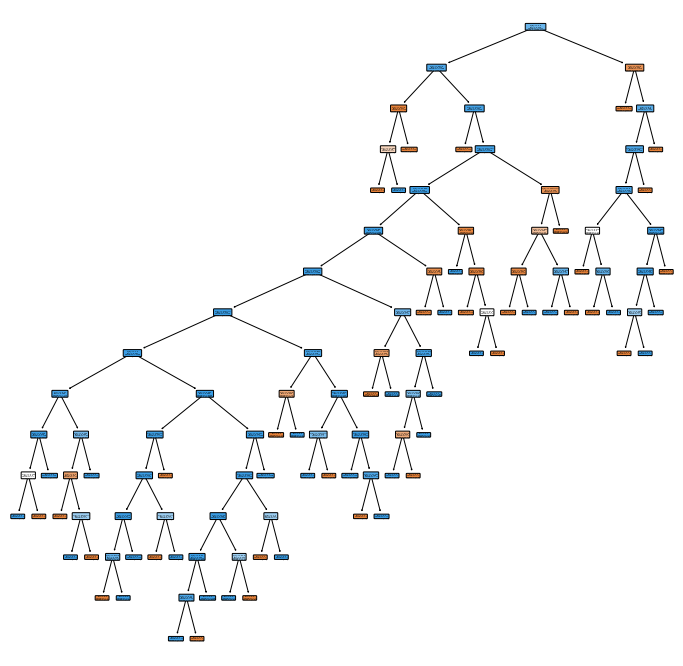

In [38]:

from sklearn import tree
plt.figure(figsize=(12,12)) 
tree.plot_tree(dtree, filled=True,  rounded=True)


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       613
           1       0.99      0.99      0.99      2548

    accuracy                           0.99      3161
   macro avg       0.98      0.98      0.98      3161
weighted avg       0.99      0.99      0.99      3161



In [40]:
m2=confusion_matrix(y_test,predictions)
print(m2)

[[ 593   20]
 [  18 2530]]


# random forest

In [41]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=40)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=40)

In [42]:
rfc_pred = rfc.predict(X_test)

In [43]:
rfc.score(X_train,y_train)

0.9890914757674926

In [44]:
rfc.score(X_test,y_test)

0.981651376146789

In [45]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       613
           1       0.98      1.00      0.99      2548

    accuracy                           0.98      3161
   macro avg       0.98      0.96      0.97      3161
weighted avg       0.98      0.98      0.98      3161



In [46]:
m3=confusion_matrix(y_test,rfc_pred)
print(m3)

[[ 566   47]
 [  11 2537]]


# XGBoost

In [47]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[15:33:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [49]:
y_prediction = model.predict(X_test)

In [50]:
model.score(X_train,y_train)

1.0

In [51]:
model.score(X_test,y_test)

0.9908256880733946

In [52]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       613
           1       0.99      1.00      0.99      2548

    accuracy                           0.99      3161
   macro avg       0.99      0.98      0.99      3161
weighted avg       0.99      0.99      0.99      3161



In [54]:

m4=confusion_matrix(y_test,y_prediction)
print(m4)


[[ 591   22]
 [   7 2541]]


In [55]:
# Використайте ансамбель voting для всіх моделей

from sklearn.ensemble import VotingClassifier

VR=VotingClassifier(estimators=[('1',logmodel),('2', dtree),('3', rfc),('4', model)])
VR.fit(X,y)

[15:35:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('1', LogisticRegression(max_iter=200)),
                             ('2', DecisionTreeClassifier(max_depth=17)),
                             ('3',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=10,
                                                     random_state=40)),
                             ('4',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,


In [56]:
VR.score(X_train,y_train)

1.0

In [57]:
VR.score(X_test,y_test)

1.0

In [58]:
y_prediction = VR.predict(X_test)
m5=confusion_matrix(y_test,y_prediction)
print(m5)

[[ 613    0]
 [   0 2548]]


In [60]:
# Порівняйте результати моделей та зробіть висновки

print('Logistic regression:')
print(m1)
print('Decision tree:')
print(m2)
print('Random forest:')
print(m3)
print('XGBoost:')
print(m4)
print('Voting Regressor:')
print(m5)

Logistic regression:
[[ 336  277]
 [  59 2489]]
Decision tree:
[[ 593   20]
 [  18 2530]]
Random forest:
[[ 566   47]
 [  11 2537]]
XGBoost:
[[ 591   22]
 [   7 2541]]
Voting Regressor:
[[ 613    0]
 [   0 2548]]


### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [64]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [65]:

df = pd.read_csv('air_quality_no2_long.csv')
df



,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [66]:
len(df['city'].unique())

3

In [67]:

start=min(df['date.utc'])
finish=max(df['date.utc'])
print('start: ', start, ', finish:',finish)

start:  2019-05-07 01:00:00+00:00 , finish: 2019-06-21 00:00:00+00:00


In [68]:


import datetime as dt

df['day'] = (pd.to_datetime(df['date.utc'])).dt.dayofweek
df1=df[df['city']=="Paris"].groupby('day')['value'].mean()
df2=df[df['city']=="London"].groupby('day')['value'].mean()
df3=df[df['city']=="Antwerpen"].groupby('day')['value'].mean()

data={"Paris": df1, "London":df2, "Antwerpen":df3}
frame = pd.DataFrame(data)
frame

,Paris,London,Antwerpen
day,,,
0,24.856250,23.969697,27.875000
1,30.999359,24.885714,22.214286
2,29.165753,23.460432,21.125000
3,28.600690,24.780142,27.500000
4,31.617986,26.446809,28.400000
5,25.266154,24.977612,33.500000
6,23.274306,24.859155,21.896552


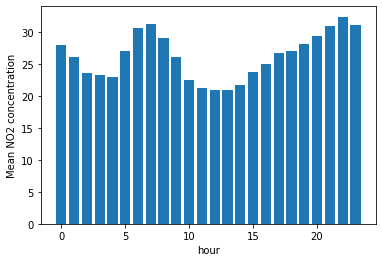

In [80]:
import datetime as dt
df['hour'] = (pd.to_datetime(df['date.utc'])).dt.hour
df1=df.groupby('hour')['value'].mean()
df=df.drop('hour', 1)

fig, ax = plt.subplots()
ax.bar(df1.index,df1)
ax.set_xlabel('hour')
ax.set_ylabel('Mean NO2 concentration')
plt.show()